From:  
* https://github.com/Giskard-AI/giskard/blob/19a90a1493ddef27a03a6c5442143088ebee3e6f/docs/getting_started/quickstart/quickstart_vision.ipynb

Recommended to change runtime instance type to A100 for faster performance, or this can take more than 4h vs 30m.

In [ ]:
%pip install "numpy==1.26.4" "pandas==2.2.3" "datasets==3.4.1" --force

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 📸 Vision Quickstart

Giskard is an open-source framework for testing all ML models, from LLMs to tabular models. Don't hesitate to give the project a [star on GitHub](https://github.com/Giskard-AI/giskard) ⭐️ if you find it useful!

In this notebook, you'll learn how to scan an image classification model in a few lines of code, thanks to Giskard's open-source Python library.

Use-case:

* Skin cancer detection
* [Hugging Face skin cancer classification model](https://huggingface.co/Anwarkh1/Skin_Cancer-Image_Classification)
* [Hugging Face skin cancer dataset](https://huggingface.co/marmal88/skin_cancer)

Outline:

* Detect vulnerabilities automatically with Giskard's scan
* Automatically generate a test report for your image classification model beyond accuracy-related metrics

## Install dependencies
To run the scan on a vision model, you would need to install both the ``giskard-vision`` and the ``giskard`` library.

In [ ]:
%pip install "giskard==2.16.2" "giskard-vision==1.0.0" --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.7/553.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.0/681.0 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import libraries

In this example, we load the demo wrapper for a Hugging Face skin cancer detection model and the demo dataloader for the Hugging Face skin cancer image classification dataset.

In [ ]:
from giskard_vision.image_classification.models.wrappers import SkinCancerHFModel
from giskard_vision.image_classification.dataloaders.loaders import DataLoaderSkinCancer
from giskard_vision.core.scanner import scan

In [ ]:
ds = DataLoaderSkinCancer()
model = SkinCancerHFModel()

README.md:   0%|          | 0.00/3.24k [00:00<?, ?B/s]

(…)-00000-of-00005-7eed077f2f8e6d15.parquet:   0%|          | 0.00/521M [00:00<?, ?B/s]

(…)-00001-of-00005-50ba64fd20294ba8.parquet:   0%|          | 0.00/525M [00:00<?, ?B/s]

(…)-00002-of-00005-36c02a25cbdd5481.parquet:   0%|          | 0.00/527M [00:00<?, ?B/s]

(…)-00003-of-00005-27da80cf1cb2598d.parquet:   0%|          | 0.00/528M [00:00<?, ?B/s]

(…)-00004-of-00005-264fb0c337457a9b.parquet:   0%|          | 0.00/548M [00:00<?, ?B/s]

(…)-00000-of-00002-9cc6b2a1db12d1a6.parquet:   0%|          | 0.00/341M [00:00<?, ?B/s]

(…)-00001-of-00002-900252bc4d7798ec.parquet:   0%|          | 0.00/348M [00:00<?, ?B/s]

(…)-00000-of-00001-61e7cf54bf274ae2.parquet:   0%|          | 0.00/355M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9577 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2492 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1285 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


## Generate scan report

Giskard’s scan allows you to detect vulnerabilities in your model automatically. On landmark detection, these include performance biases, unrobustness and ethical issues.

In [ ]:
results = scan(model, ds, raise_exceptions=True, num_images=5)

INFO:giskard_vision.core.scanner.scanner:Running detectors: ['NoiseDetector', 'BlurDetector', 'MetaDataDetectorClassification', 'ColorDetector']


🔎 Running scan…
Running detector NoiseDetector…
NoiseDetector: 0 issue detected. (Took 0:06:33.504060)
Running detector BlurDetector…
BlurDetector: 0 issue detected. (Took 0:06:03.805411)
Running detector MetaDataDetectorClassification…


100%|██████████| 1285/1285 [03:29<00:00,  6.12it/s]
INFO:giskard.datasets.base:Your 'pandas.DataFrame' is successfully wrapped by Giskard's 'Dataset' wrapper class.
INFO:giskard.models.automodel:Your 'prediction_function' is successfully wrapped by Giskard's 'PredictionFunctionModel' wrapper class.
INFO:giskard.datasets.base:Casting dataframe columns from {'height': 'int64', 'width': 'int64', 'nb_channels': 'int64', 'brightness': 'float64', 'average_color_r': 'float64', 'average_color_g': 'float64', 'average_color_b': 'float64', 'contrast': 'uint8', 'entropy': 'float32', 'depth': 'int64', 'age': 'float64', 'sex': 'object', 'localization': 'object', 'index': 'int64'} to {'height': 'int64', 'width': 'int64', 'nb_channels': 'int64', 'brightness': 'float64', 'average_color_r': 'float64', 'average_color_g': 'float64', 'average_color_b': 'float64', 'contrast': 'uint8', 'entropy': 'float32', 'depth': 'int64', 'age': 'float64', 'sex': 'object', 'localization': 'object', 'index': 'int64'}
INFO:

Your model is successfully validated.


INFO:giskard.scanner.logger:OverconfidenceDetector: 7 slices found (took 0:00:01.867251)
INFO:giskard.scanner.logger:OverconfidenceDetector: Analyzing issues
INFO:giskard.datasets.base:Your 'pandas.DataFrame' is successfully wrapped by Giskard's 'Dataset' wrapper class.
INFO:giskard.scanner.logger:OverconfidenceDetector: Using overconfidence threshold = 0.28776978417266186
INFO:giskard.scanner.logger:OverconfidenceDetector: 0 issues found (took 0:00:00.037496)
INFO:giskard.scanner.logger:UnderconfidenceDetector: Running
INFO:giskard.scanner.logger:UnderconfidenceDetector: Calculating loss
INFO:giskard.datasets.base:Casting dataframe columns from {'height': 'int64', 'width': 'int64', 'nb_channels': 'int64', 'brightness': 'float64', 'average_color_r': 'float64', 'average_color_g': 'float64', 'average_color_b': 'float64', 'contrast': 'uint8', 'entropy': 'float32', 'depth': 'int64', 'age': 'float64', 'sex': 'object', 'localization': 'object', 'index': 'int64'} to {'height': 'int64', 'width

MetaDataDetectorClassification: 13 issues detected. (Took 0:04:09.667243)
Running detector ColorDetector…
ColorDetector: 1 issue detected. (Took 0:06:05.071103)
Scan completed: 14 issues found. (Took 0:22:52.049277)


If you are running in a notebook, you can display the scan report directly in the notebook using `display(...)`, otherwise you can export the report to an HTML file. Check the [API Reference](https://docs.giskard.ai/en/stable/reference/scan/report.html#giskard.scanner.report.ScanReport) for more details on the export methods available on the `ScanReport` class.

<iframe id="scan-140020870327376" srcdoc="<!doctype html>
<html lang="en">

<head>
 <title>Giskard Scan Results</title>
 <base target="_blank">
 <meta charset="utf-8">
 
<style>pre code.hljs{display:block;overflow-x:auto;padding:1em}code.hljs{padding:3px 5px}
/*!
 Theme: GitHub Dark
 Description: Dark theme as seen on github.com
 Author: github.com
 Maintainer: @Hirse
 Updated: 2021-05-15

 Outdated base version: https://github.com/primer/github-syntax-dark
 Current colors taken from GitHub's CSS
*/.hljs{background:#0d1117;color:#c9d1d9}.hljs-doctag,.hljs-keyword,.hljs-meta .hljs-keyword,.hljs-template-tag,.hljs-template-variable,.hljs-type,.hljs-variable.language_{color:#ff7b72}.hljs-title,.hljs-title.class_,.hljs-title.class_.inherited__,.hljs-title.function_{color:#d2a8ff}.hljs-attr,.hljs-attribute,.hljs-literal,.hljs-meta,.hljs-number,.hljs-operator,.hljs-selector-attr,.hljs-selector-class,.hljs-selector-id,.hljs-variable{color:#79c0ff}.hljs-meta .hljs-string,.hljs-regexp,.hljs-string{color:#a5d6ff}.hljs-built_in,.hljs-symbol{color:#ffa657}.hljs-code,.hljs-comment,.hljs-formula{color:#8b949e}.hljs-name,.hljs-quote,.hljs-selector-pseudo,.hljs-selector-tag{color:#7ee787}.hljs-subst{color:#c9d1d9}.hljs-section{color:#1f6feb;font-weight:700}.hljs-bullet{color:#f2cc60}.hljs-emphasis{color:#c9d1d9;font-style:italic}.hljs-strong{color:#c9d1d9;font-weight:700}.hljs-addition{background-color:#033a16;color:#aff5b4}.hljs-deletion{background-color:#67060c;color:#ffdcd7}.hljs-copy-wrapper{overflow:hidden;position:relative}.hljs-copy-button:focus,.hljs-copy-wrapper:hover .hljs-copy-button{transform:translateX(0)}.hljs-copy-button{background-color:#2d2b57;background-color:var(--hljs-theme-background);background-image:url('data:image/svg+xml;charset=utf-8,<svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" fill="none" viewBox="0 0 24 24"><path fill="%23fff" fill-rule="evenodd" d="M6 5a1 1 0 0 0-1 1v14a1 1 0 0 0 1 1h12a1 1 0 0 0 1-1V6a1 1 0 0 0-1-1h-2a1 1 0 1 1 0-2h2a3 3 0 0 1 3 3v14a3 3 0 0 1-3 3H6a3 3 0 0 1-3-3V6a3 3 0 0 1 3-3h2a1 1 0 0 1 0 2H6Z" clip-rule="evenodd"/><path fill="%23fff" fill-rule="evenodd" d="M7 3a2 2 0 0 1 2-2h6a2 2 0 0 1 2 2v2a2 2 0 0 1-2 2H9a2 2 0 0 1-2-2V3Zm8 0H9v2h6V3Z" clip-rule="evenodd"/></svg>');background-position:50%;background-repeat:no-repeat;border:1px solid #ffffff22;border-radius:.25rem;color:#fff;height:2rem;position:absolute;right:1em;text-indent:-9999px;top:1em;transition:background-color .2s ease,transform .2s ease-out;width:2rem}.hljs-copy-button:hover{border-color:#ffffff44}.hljs-copy-button:active{border-color:#ffffff66}.hljs-copy-button[data-copied=true]{background-image:none;text-indent:0;width:auto}@media (prefers-reduced-motion){.hljs-copy-button{transition:none}}.hljs-copy-alert{clip:rect(0 0 0 0);-webkit-clip-path:inset(50%);clip-path:inset(50%);height:1px;overflow:hidden;position:absolute;white-space:nowrap;width:1px}
/*! tailwindcss v3.3.2 | MIT License | https://tailwindcss.com*/*,:after,:before{border:0 solid #e5e7eb;box-sizing:border-box}:after,:before{--tw-content:""}html{-webkit-text-size-adjust:100%;font-feature-settings:normal;font-family:ui-sans-serif,system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji;font-variation-settings:normal;line-height:1.5;-moz-tab-size:4;-o-tab-size:4;tab-size:4}body{line-height:inherit;margin:0}hr{border-top-width:1px;color:inherit;height:0}abbr:where([title]){-webkit-text-decoration:underline dotted;text-decoration:underline dotted}h1,h2,h3,h4,h5,h6{font-size:inherit;font-weight:inherit}a{color:inherit;text-decoration:inherit}b,strong{font-weight:bolder}code,kbd,pre,samp{font-family:ui-monospace,SFMono-Regular,Menlo,Monaco,Consolas,Liberation Mono,Courier New,monospace;font-size:1em}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:baseline}sub{bottom:-.25em}sup{top:-.5em}table{border-collaps
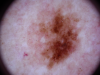
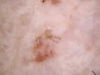
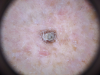
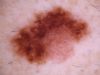
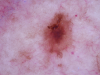
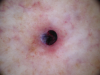
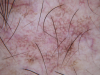
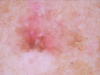
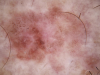
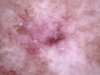
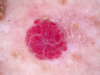
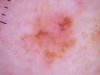
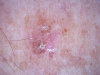
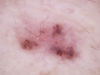
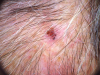
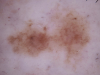
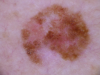
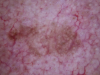
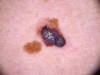
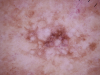
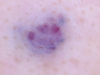
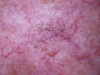
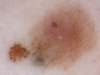
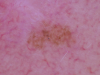
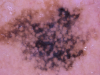
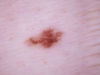
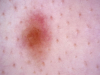
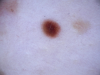
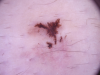
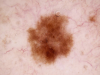
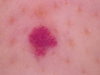
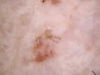
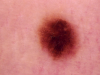
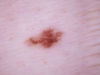
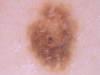
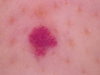
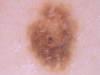
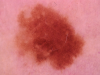
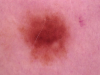
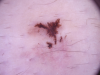
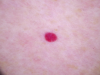
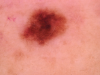
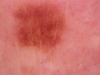
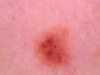
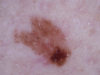
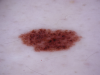
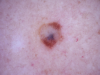
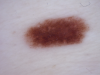
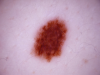
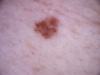
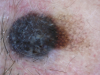
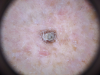
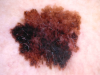
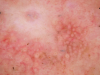
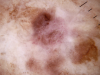
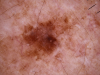
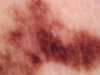
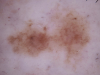
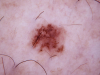
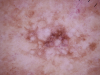
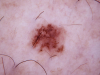
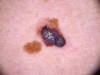
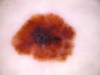
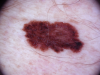
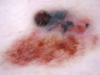
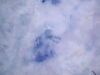
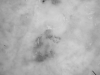

In [ ]:
display(results)

# Save it to file
results.to_html("scan_report.html")